In [6]:
from time import sleep
from numpy import tensordot
from selenium.common.exceptions import *
from click import NoSuchOption
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import pandas as pd


final_data=pd.DataFrame() #Initiating Dataframe to store data
tender_name_list=[]#Initiating List to store respective tender name
Industry_list=[]#Initiating List to store respective industry
Location_of_contract_list=[]#Initiating List to store respective location of contract
Value_of_contract_list=[]#Initiating List to store respective value of contract
Procurement_reference_list=[]#Initiating List to store respective procurment 
Published_date_list=[]#Initiating List to store respective published date
Closing_date_list=[]#Initiating List to store respective closing date
Closing_time_list=[]#Initiating List to store respective clossing time

path = r'geckodriver.exe'
driver = webdriver.Firefox(executable_path=path)

for z in range(1,7):  #Note-Increase the range and we can scrape more data
    try:
        driver.get(f'https://www.contractsfinder.service.gov.uk/Search/Results?page={z}#07c879eb-5e62-435b-8034-10e114ec9938')
        sleep(2) 
        
        for x in range(1,21):
                try:
                    driver.find_element(By.XPATH,f'//div[3]/div/div/div/div[1]/div[{x}]/div[1]/h2/a').click()
                    sleep(2)
                    try:
                        tender_name=driver.find_element(By.XPATH,'//h1[@class="govuk-heading-l break-word"]')
                        tender_name_list.append(tender_name.text)
                    except:
                        tender_name_list.append('tender name missing')

                    try:
                        industry=driver.find_element(By.XPATH,'//*[@id="content-holder-left"]/div[3]/ul/li/p')
                        Industry_list.append(industry.text)
                    except:
                        Industry_list.append('industry missing')

                    try:    
                        location_of_contract=driver.find_element(By.XPATH,'//*[@id="content-holder-left"]/div[3]/p[2]/span')
                        Location_of_contract_list.append(location_of_contract.text)
                    except:
                        Location_of_contract_list.append('location of contract missing')
                    
                    try:
                        value_of_contract=driver.find_element(By.XPATH,'//*[@id="content-holder-left"]/div[3]/p[3]')
                        Value_of_contract_list.append(value_of_contract.text)
                    except:
                        Value_of_contract_list.append('value of contract missing')

                    try:
                        procurement_reference=driver.find_element(By.XPATH,'//*[@id="content-holder-left"]/div[3]/p[4]')
                        Procurement_reference_list.append(procurement_reference.text)
                    except:
                        Procurement_reference_list.append('procurement reference missing')

                    try:
                        published_date=driver.find_element(By.XPATH,'//*[@id="content-holder-left"]/div[3]/p[5]')
                        Published_date_list.append(published_date.text)
                    except:
                        Published_date_list.append('published date missing')

                    try:
                        closing_date=driver.find_element(By.XPATH,'//*[@id="content-holder-left"]/div[3]/p[6]')
                        Closing_date_list.append(closing_date.text)
                    except:
                        Closing_date_list.append('closing date missing')
                    
                    try:
                        closing_time=driver.find_element(By.XPATH,'//*[@id="content-holder-left"]/div[3]/p[7]')
                        Closing_time_list.append(closing_time.text)
                    except:
                        Closing_time_list.append('closing time missing')

                        
                except:
                    print('NO DATA RECEIVED')
                driver.back()
                
    except:
        print('INVALID URL')


final_data['Tender name']=tender_name_list
final_data['Industry']=Industry_list
final_data['Location of contract']=Location_of_contract_list
final_data['Value of contract']=Value_of_contract_list
final_data['Procurment references']=Procurement_reference_list
final_data['Published date']=Published_date_list
final_data['closing date']=Closing_date_list
final_data['closing time']=Closing_time_list
final_data.to_csv(r"D:\amazon dataset\richa.csv")

C:\Users\Dell\AppData\Local\Temp\ipykernel_20156\4150020442.py:22: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Firefox(executable_path=path)


In [13]:
# importing required libraries
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv("richa.csv")
df.head()

,Unnamed: 0,Tender name,Industry,Location of contract,Value of contract,Procurment references,Published date,closing date,closing time
0,0,Residence Roof Insulation Works Oslo,Roof insulation work - 45261410,SW1A 2AH,£0,tender_315329/1106442,15 September 2022,10 October 2022,3pm
1,1,General Construction Multi Trade - GCMT - Hous...,Construction work - 45000000,United Kingdom,"£10,000 to £30,000",4CD94822-57B3-4E8F-9BB5-EAFD6046F67D,15 September 2022,30 September 2022,12pm
2,2,SUEZ St Erth Waste Transfer Station Cornwall -...,Construction work - 45000000,England,"£1,000,000",CLTD001-DN633319-94512033,15 September 2022,29 September 2022,2pm
3,3,Force Medical Advisor (FMA) Services,Administrative healthcare services - 75122000,South West,£0,20220915143325-30310,15 September 2022,19 October 2022,12pm
4,4,Customer Experience Platform,Software package and information systems - 480...,NR1 2DH,£0,IT-217-2349-NCCT42250,15 September 2022,18 October 2022,10am


In [15]:
df.shape

(120, 9)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             120 non-null    int64 
 1   Tender name            120 non-null    object
 2   Industry               120 non-null    object
 3   Location of contract   120 non-null    object
 4   Value of contract      120 non-null    object
 5   Procurment references  120 non-null    object
 6   Published date         120 non-null    object
 7   closing date           120 non-null    object
 8   closing time           120 non-null    object
dtypes: int64(1), object(8)
memory usage: 8.6+ KB


In [17]:
#cleaning
df['Procurment references'] =df['Procurment references'].str.replace("Procurment references","")

In [18]:
df['Value of contract'] =df['Value of contract'].str.replace("Value of contract","")

In [19]:
df['Location of contract'] =df['Location of contract'].str.replace("Location of contract","")

In [21]:
df['closing date'] =df['closing date'].str.replace("closing date","")

In [22]:
df['closing time'] =df['closing time'].str.replace("closing time","")

In [23]:
df['Industry'] =df['Industry'].str.replace("Industry","")

In [26]:
df.describe()

,Unnamed: 0
count,120.000000
mean,59.500000
std,34.785054
min,0.000000
25%,29.750000
50%,59.500000
75%,89.250000
max,119.000000


In [27]:
df['Location of contract'].value_counts()

England                                                                                                                                                     27
Yorkshire and the Humber                                                                                                                                    12
United Kingdom                                                                                                                                               8
Any region                                                                                                                                                   7
North West                                                                                                                                                   5
West Midlands                                                                                                                                                4
South East                                    

In [28]:
#contract values
newdf = df["Value of contract"].str.split(" ", n = 4, expand = True)

In [29]:
newdf

,0,1,2
0,£0,None,None
1,"£10,000",to,"£30,000"
2,"£1,000,000",None,None
3,£0,None,None
4,£0,None,None
...,...,...,...
115,"£1,400,000",None,None
116,£0,None,None
117,£0,None,None
118,"£15,000",to,"£24,999"


In [31]:
#taking highest values
newdf[2]=newdf[2].str.replace("£","")
newdf

,0,1,2
0,£0,None,None
1,"£10,000",to,"30,000"
2,"£1,000,000",None,None
3,£0,None,None
4,£0,None,None
...,...,...,...
115,"£1,400,000",None,None
116,£0,None,None
117,£0,None,None
118,"£15,000",to,"24,999"


In [33]:
df['Value of contract']=newdf[2]

In [35]:
df['Value of contract'] =df['Value of contract'].fillna(0)

In [52]:
df.head()

,Unnamed: 0,Tender name,Industry,Location of contract,Value of contract,Procurment references,Published date,closing date,closing time,contract_value
0,0,Residence Roof Insulation Works Oslo,Roof insulation work - 45261410,SW1A 2AH,0,tender_315329/1106442,15 September 2022,10 October 2022,3pm,0
1,1,General Construction Multi Trade - GCMT - Hous...,Construction work - 45000000,United Kingdom,"30,000",4CD94822-57B3-4E8F-9BB5-EAFD6046F67D,15 September 2022,30 September 2022,12pm,"30,000"
2,2,SUEZ St Erth Waste Transfer Station Cornwall -...,Construction work - 45000000,England,0,CLTD001-DN633319-94512033,15 September 2022,29 September 2022,2pm,0
3,3,Force Medical Advisor (FMA) Services,Administrative healthcare services - 75122000,South West,0,20220915143325-30310,15 September 2022,19 October 2022,12pm,0
4,4,Customer Experience Platform,Software package and information systems - 480...,NR1 2DH,0,IT-217-2349-NCCT42250,15 September 2022,18 October 2022,10am,0


In [38]:
import seaborn as sns

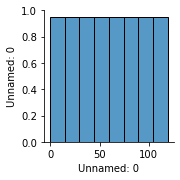

In [53]:
sns.pairplot(df)

<AxesSubplot:title={'center':'Closing year for Recieving Bids'}, xlabel='closing date', ylabel='count'>

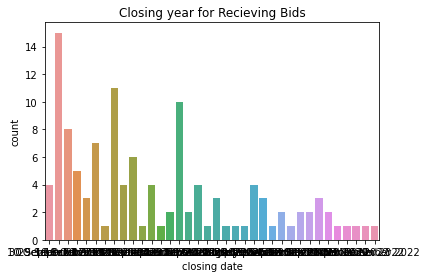

In [50]:
plt.title("Closing year for Recieving Bids")
sns.countplot(x=df['closing date'])

<AxesSubplot:title={'center':'Industry for Recieving Bids'}, xlabel='Industry', ylabel='count'>

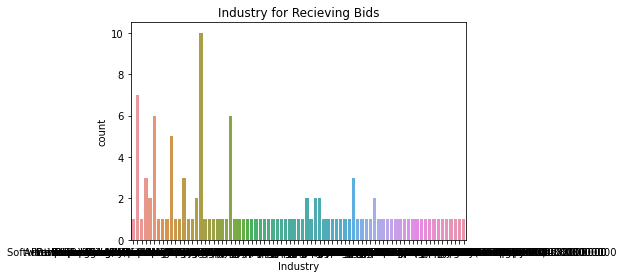

In [54]:
plt.title("Industry for Recieving Bids")
sns.countplot(x=df['Industry'])

<AxesSubplot:title={'center':'Tender based Location of contract'}, xlabel='Location of contract', ylabel='count'>

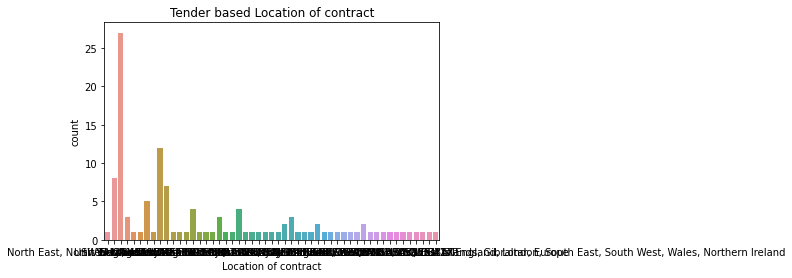

In [49]:
plt.title("Tender based Location of contract")
sns.countplot(x=df['Location of contract'])

In [43]:
from matplotlib import pyplot as plt

<AxesSubplot:title={'center':'Location of contract vs Publication year'}, xlabel='Location of contract', ylabel='count'>

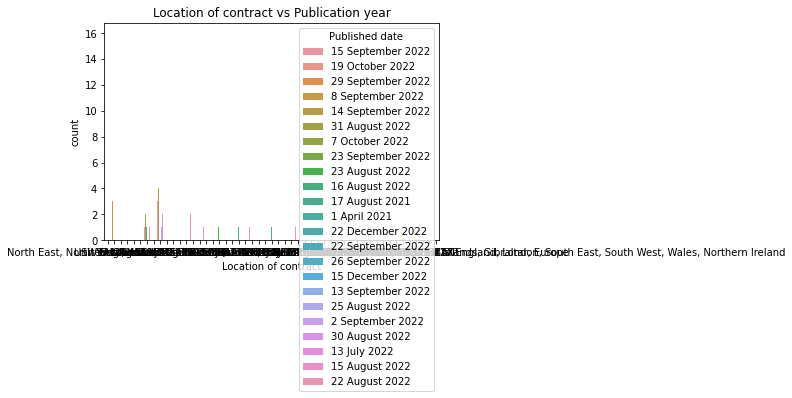

In [46]:
plt.title("Location of contract vs Publication year")
sns.countplot(x=df['Location of contract'],hue=df['Published date'])

<AxesSubplot:title={'center':'Location of contract vs  closing date'}, xlabel='Location of contract', ylabel='count'>

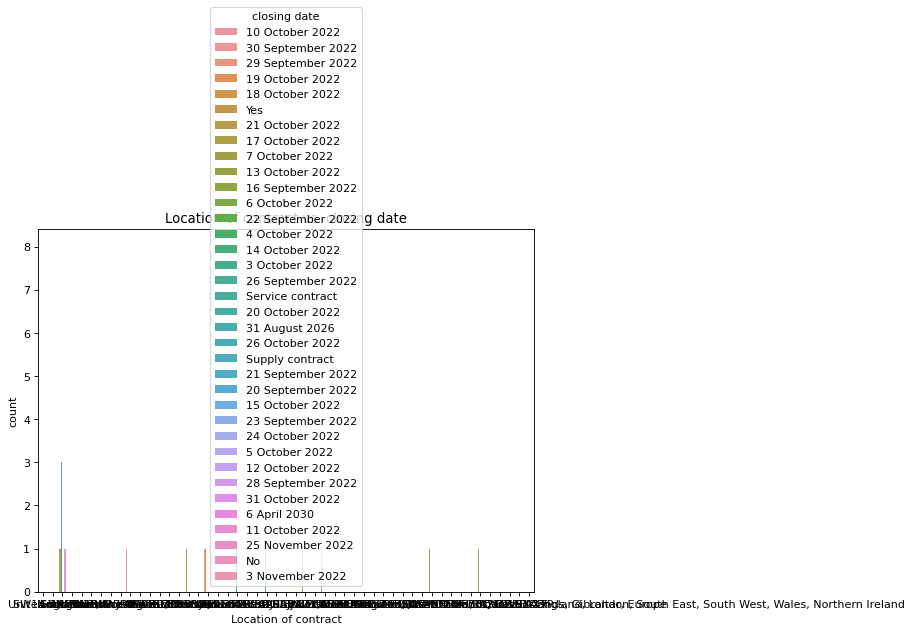

In [47]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.title("Location of contract vs  closing date")
sns.countplot(x=df['Location of contract'],hue=df['closing date'])

In [63]:
pip install pygal_maps_world

  Created wheel for pygal-maps-world: filename=pygal_maps_world-1.0.2-py3-none-any.whl size=278560 sha256=b564581459880df891504edc268d741bccc452ca51ec6b81433f13bf8b55ec37
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\f8\ff\bd\a3cb8647e19834039de7bfd2f9304e06d3314f87c135cb8b1a
Successfully built pygal-maps-world



<AxesSubplot:xlabel='Industry', ylabel='Location of contract'>

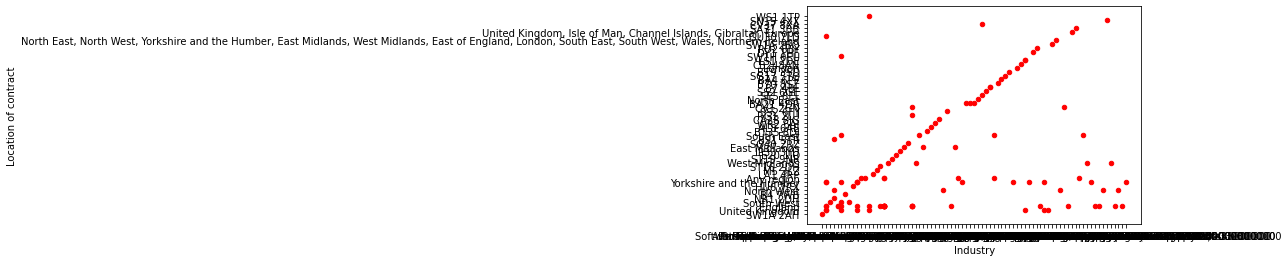

In [69]:
df.plot(x="Industry", y="Location of contract", kind="scatter", c="red",
        colormap="YlOrRd")

In [78]:
pip install geopandas

    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Dell\anaconda3\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Dell\\AppData\\Local\\Temp\\pip-install-h9mqa7z5\\fiona_c95cf377fb184b6a982856151e97bebd\\setup.py'"'"'; __file__='"'"'C:\\Users\\Dell\\AppData\\Local\\Temp\\pip-install-h9mqa7z5\\fiona_c95cf377fb184b6a982856151e97bebd\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Dell\AppData\Local\Temp\pip-pip-egg-info-eqap2zw3'
         cwd: C:\Users\Dell\AppData\Local\Temp\pip-install-h9mqa7z5\fiona_c95cf377fb184b6a982856151e97bebd\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment varia


  Using cached geopandas-0.11.1-py3-none-any.whl (1.0 MB)
  Using cached Fiona-1.8.21.tar.gz (1.0 MB)
  Using cached Fiona-1.8.20.tar.gz (1.3 MB)
  Using cached Fiona-1.8.19.tar.gz (1.3 MB)
  Using cached Fiona-1.8.18.tar.gz (1.3 MB)
  Using cached Fiona-1.8.17.tar.gz (1.3 MB)
  Using cached Fiona-1.8.16.tar.gz (1.3 MB)
  Using cached Fiona-1.8.15.tar.gz (1.3 MB)
  Using cached Fiona-1.8.14.tar.gz (1.3 MB)
  Using cached Fiona-1.8.13.post1.tar.gz (1.2 MB)
  Using cached Fiona-1.8.13.tar.gz (1.2 MB)
  Using cached Fiona-1.8.12.tar.gz (1.2 MB)
  Using cached Fiona-1.8.11.tar.gz (1.2 MB)
  Using cached Fiona-1.8.10.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.post2.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.post1.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.tar.gz (1.2 MB)
  Using cached Fiona-1.8.8.tar.gz (1.7 MB)
  Using cached Fiona-1.8.7.tar.gz (1.7 MB)
  Using cached Fiona-1.8.6.tar.gz (1.7 MB)
  Using cached Fiona-1.8.5.tar.gz (1.7 MB)
  Using cached Fiona-1.8.4.tar.gz (1.1 MB)
  Using


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Dell\anaconda3\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Dell\\AppData\\Local\\Temp\\pip-install-h9mqa7z5\\fiona_e05f29a29a8b4986ba1ba8ecd7aebe61\\setup.py'"'"'; __file__='"'"'C:\\Users\\Dell\\AppData\\Local\\Temp\\pip-install-h9mqa7z5\\fiona_e05f29a29a8b4986ba1ba8ecd7aebe61\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Dell\AppData\Local\Temp\pip-pip-egg-info-l3urhu6a'
         cwd: C:\Users\Dell\AppData\Local\Temp\pip-install-h9mqa7z5\fiona_e05f29a29a8b4986ba1ba8ecd7aebe61\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment vari

import matplotlib.pyplot as plt
import pandas as pd
from geopandas import gpd